In [1]:
import foolbox as fb
import foolbox.attacks as fa
import numpy as np
import torch
from torch import nn
from torchvision import transforms
from copy import deepcopy
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from PIL import Image

In [543]:
# images, labels = fb.utils.samples(fmodel, dataset='MNIST',batchsize=128) 
from torchvision import transforms
img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])
batch_size=100
testset = MNIST('./data', transform=img_transform, download=True, train=False)
testloader = DataLoader(testset, batch_size=batch_size, shuffle=True)


In [530]:
classNum = 10
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x
from copy import deepcopy
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12), nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28), nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

class integratedAutoencoder(nn.Module):
    def __init__(self):
        super(integratedAutoencoder, self).__init__()
        for net_index in range(classNum):
            exec("self.network{}=autoencoder()".format(net_index))
            exec("self.network{0}.load_state_dict(torch.load('./weight/ae_for_number_{0}.pth',map_location=torch.device('cpu')))".format(net_index))
    def forward(self,x):
        outputSum = torch.zeros(x.shape[0],10)
        for i in range(x.shape[0]):
            for net_index in range(classNum):
                temp=x[i]
                exec("outputSum[i,net_index]=torch.sum(self.network{}(temp))".format(net_index))
        #sum each piexl in each pic in output to get the overall brightness.
        return outputSum
intAE = integratedAutoencoder()
intAE.eval()
intAE.has_grad = False
print(1)

1


In [531]:

# design an input that looks like a 1
x = np.zeros((28, 28), dtype=np.float32)
x[5:-5, 12:-12] = 1
x=torch.from_numpy(x)
x = x.view(784) #change shape to vector
# k=list(labels).index(9)
output = intAE(x)
print(output)

for i in range(10):
    print(labels[i],torch.argmax((intAE(imagesVectors[i]))))

RuntimeError: both arguments to matmul need to be at least 1D, but they are 0D and 2D

In [544]:

counter =0
for batch in testloader:
    counter += 1
    images, labels = batch
    # print(type(images))
    imagesVectors =torch.zeros(images.shape[0],images.shape[2]*images.shape[3])
    # change image in images to 784 rows vector
    imagesVectors = images.view(images.size(0), -1)
    break

fmodel = fb.PyTorchModel(intAE,bounds=(-1,1))

# Started to attack test

In [ ]:
def get_device():
    if torch.cuda.is_available():
        device = 'cuda:'+str(GPU_NUM)
        print("using gpu %s: " % device)
    else:
        device = 'cpu'
        print("using cpu")
    return device

In [545]:
clean = fb.utils.accuracy(fmodel,imagesVectors, labels)

In [546]:
attackZoo ={'L0SAPA':fb.attacks.SaltAndPepperNoiseAttack(),
            'L0PA':None,
            'L2IGD':fb.attacks.L2BasicIterativeAttack(),
            'L2AGNA':fb.attacks.L2AdditiveUniformNoiseAttack(),
            'L2BA':fb.attacks.BoundaryAttack(),
            'L2DeepFool':fb.attacks.L2DeepFoolAttack(),
            'L2PA':None,
            'LinfFGSM':fb.attacks.LinfFastGradientAttack(),
            'LinfIFGSM':None,
            'LinfPGD':fb.attacks.LinfBasicIterativeAttack(),
            'LinfIGM':None,
            }

In [547]:
attackAcc ={'L0SAPA':fb.attacks.SaltAndPepperNoiseAttack(),
            'L0PA':None,
            'L2IGD':fb.attacks.L2BasicIterativeAttack(),
            'L2AGNA':fb.attacks.L2AdditiveUniformNoiseAttack(),
            'L2BA':fb.attacks.BoundaryAttack(),
            'L2DeepFool':fb.attacks.L2DeepFoolAttack(),
            'L2PA':None,
            'LinfFGSM':fb.attacks.LinfFastGradientAttack(),
            'LinfIFGSM':None,
            'LinfPGD':fb.attacks.LinfBasicIterativeAttack(),
            'LinfIGM':None,
            }
for key,attack in attackZoo.items():
    if attack!=None:
        attackAcc[key] = attack(fmodel,imagesVectors,labels,epsilons=0.03)
    break

KeyboardInterrupt: 

In [556]:
data =np.load("results.npy",allow_pickle=True).item()
data["L0SAPA"]

tensor(1.)

In [4]:
pic=np.load("pic_for_LinfFGSM.npy",allow_pickle=True)

In [17]:
pic[1].reshape((28,28))

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ],
       [-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.    

In [8]:
is_adv = np.load("is_adv_for_LinfFGSM.npy",allow_pickle=True)

In [49]:
adv_pic=[]
for i in range(is_adv.shape[0]):
    if is_adv[i]==True:
        pic_square=(pic[i].reshape((28,28))+1)/2*255
        adv_pic.append(pic_square.astype(int))


In [50]:
adv_pic[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  38,  38,  38,  38,  38,  38,
         38,   0,   0,   0,  38,  38,  38,   0,   0,  38,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38,  38,  38,  38,  38,
         38,  38,  38,   0,  38,  38,   0,  38,  38,   0,  38,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  38,   0,   0,
          0,   0,   0,  38,  38,  38,   0,  38,  38,  38,  38,  38,  38,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  38,  38,  38,   0,  84,
        215,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
          0,   0],
       [  

In [65]:
im = Image.fromarray(adv_pic[3])
# im = im.convert() 
im.show()
# im.save("test.png")

TypeError: Cannot handle this data type: (1, 1), <i8

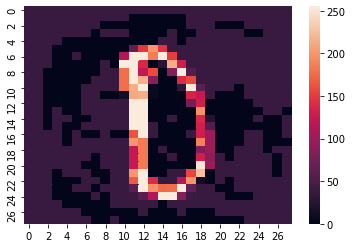

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range(len(adv_pic)):
    plt.clf()
    a=sns.heatmap(data=adv_pic[i])
    plt.savefig('adv_{}.png'.format(i),dpi=300)